# Test Kaggle Submission 
## Forest cover type
### Robin Masliah

In [25]:
import os
os.system("printf '\a'") 
import pandas as pd
import numpy as np
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.__version__

'2.2.1'

In [26]:
test = pd.read_csv('testkaggle.csv', sep=',')
train = pd.read_csv('trainkaggle.csv', sep=',')

In [27]:
test = test.dropna()
train = train.dropna()
train.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

In [28]:
test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,3394,117,12,351,55,1871,240,229,118,3046,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,15122,3388,121,11,342,49,1852,239,231,121,3059,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,15123,3385,123,10,335,46,1832,237,233,126,3073,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,15124,3382,115,8,331,43,1813,234,233,130,3087,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,15125,3379,95,10,330,40,1794,236,225,120,3101,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [29]:
pd.set_option('display.max_columns', None) 
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [30]:
# From both train and test data
train = train.drop(['Soil_Type7', 'Soil_Type15'], axis = 1)
test = test.drop(['Soil_Type7', 'Soil_Type15'], axis = 1)

# Also drop 'Id'
train = train.iloc[:,1:]
test = test.iloc[:,1:]

<IPython.core.display.Javascript object>


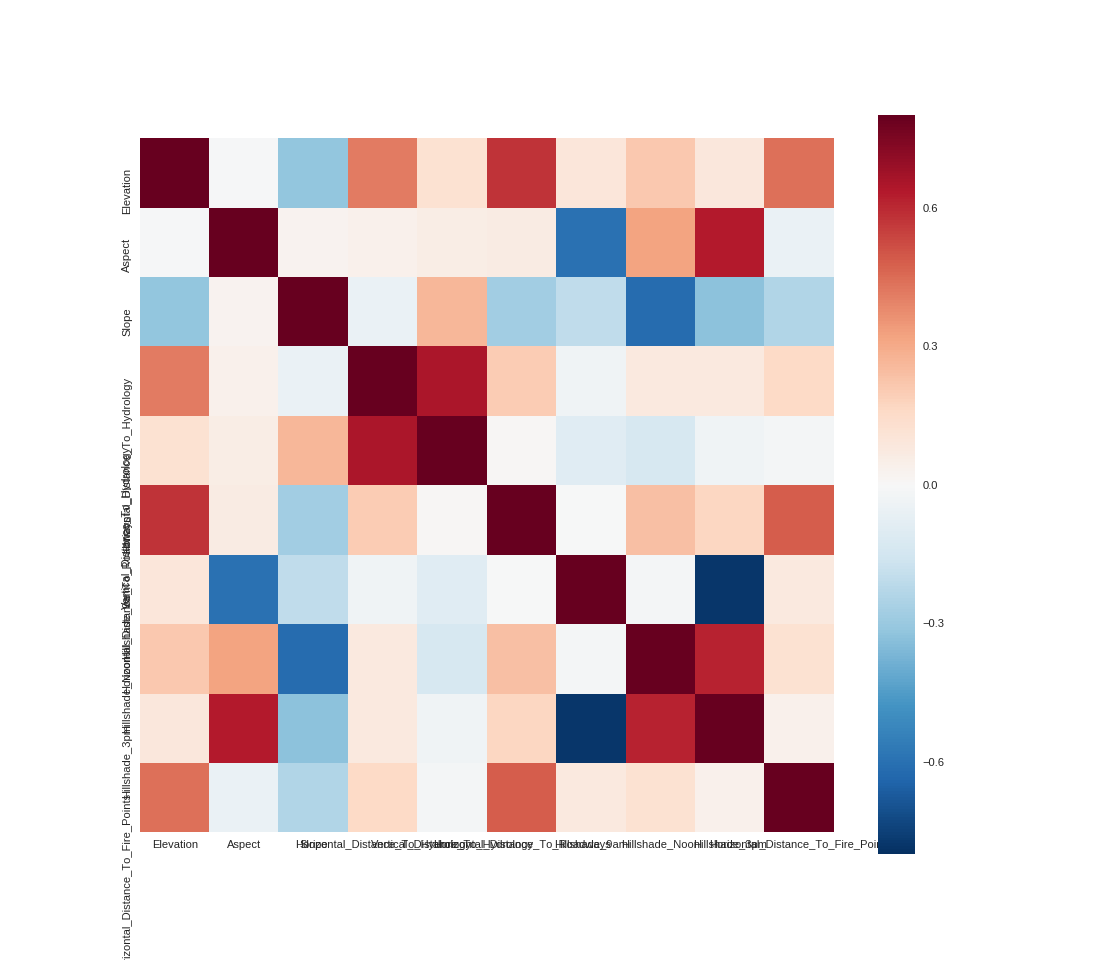

In [31]:
size = 10
corrmat = train.iloc[:,:size].corr()
f, ax = plt.subplots(figsize = (14,12))
sns.heatmap(corrmat,vmax=0.8,square=True);

In [37]:
data = train.iloc[:,:size]

# Get name of the columns
cols = data.columns

# Calculate the pearson correlation coefficients for all combinations
data_corr = data.corr()

# Threshold ( only highly correlated ones matter)
threshold = 0.5
corr_list = []


In [38]:
data_corr

,Aspect,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2
Aspect,1.000000,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169,-0.131262,0.028238
Horizontal_Distance_To_Hydrology,0.040732,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817,-0.009402,0.087484
Vertical_Distance_To_Hydrology,0.056412,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048,-0.117835,0.017108
Horizontal_Distance_To_Roadways,0.066184,0.203397,0.011555,1.000000,-0.003398,0.240684,0.173882,0.486386,0.367786,-0.080758
Hillshade_9am,-0.593997,-0.033803,-0.095930,-0.003398,1.000000,-0.013712,-0.779965,0.078144,0.173382,-0.012096
Hillshade_Noon,0.324912,0.080047,-0.132948,0.240684,-0.013712,1.000000,0.614526,0.122098,-0.014362,0.038468
Hillshade_3pm,0.635022,0.080833,-0.035559,0.173882,-0.779965,0.614526,1.000000,0.043162,-0.119736,0.041908
Horizontal_Distance_To_Fire_Points,-0.052169,0.158817,-0.015048,0.486386,0.078144,0.122098,0.043162,1.000000,0.430723,0.044781
Wilderness_Area1,-0.131262,-0.009402,-0.117835,0.367786,0.173382,-0.014362,-0.119736,0.430723,1.000000,-0.103217
Wilderness_Area2,0.028238,0.087484,0.017108,-0.080758,-0.012096,0.038468,0.041908,0.044781,-0.103217,1.000000


In [32]:
slope = train["Slope"].values
elevation = train["Elevation"].values

train["height"] =  ((slope)**2 + (elevation)**2)**(1/2)

slope = test["Slope"].values
elevation = test["Elevation"].values

test["height"] =  ((slope)**2 + (elevation)**2)**(1/2)

In [33]:
train = train.drop(['Slope', 'Elevation'], axis = 1)
test = test.drop(['Slope', 'Elevation'], axis = 1)

In [34]:
train.head()

,Aspect,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,height
0,51,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,2596.001733
1,56,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,2590.000772
2,139,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2804.014444
3,155,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2785.058168
4,45,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,2595.000771


# Random Forest

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

In [14]:
target = train["Cover_Type"].values
features = train[["Aspect", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points", "Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4", "Soil_Type1", "Soil_Type2", "Soil_Type3", "Soil_Type4", "Soil_Type5", "Soil_Type6", "Soil_Type8", "Soil_Type9", "Soil_Type10",
                  "Soil_Type11", "Soil_Type12", "Soil_Type13", "Soil_Type14", "Soil_Type16", "Soil_Type17", "Soil_Type18", "Soil_Type19", "Soil_Type20", "Soil_Type21", "Soil_Type22", "Soil_Type23", "Soil_Type24", "Soil_Type25", "Soil_Type26", "Soil_Type27", "Soil_Type28", "Soil_Type29", "Soil_Type30", "Soil_Type31", "Soil_Type32", "Soil_Type33", "Soil_Type34", "Soil_Type35", "Soil_Type36", "Soil_Type37", "Soil_Type38", "Soil_Type39", "Soil_Type40", "height"]].values


seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)

forest = RandomForestClassifier(n_estimators=10, criterion="gini", max_depth=None,
                                min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                max_features="auto", max_leaf_nodes=None, min_impurity_decrease=0.0,
                                min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None,
                                verbose=0, warm_start=False, class_weight=None)


model = BaggingClassifier(base_estimator=forest, random_state=seed)

results = model_selection.cross_val_score(model, features, target, cv=kfold)
print(results.mean())


my_forest = forest.fit(features, target)
print(my_forest.feature_importances_)

print(my_forest.score(features, target))

test_features = test[["Aspect", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points", "Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4", "Soil_Type1", "Soil_Type2", "Soil_Type3", "Soil_Type4", "Soil_Type5", "Soil_Type6", "Soil_Type8", "Soil_Type9", "Soil_Type10",
                      "Soil_Type11", "Soil_Type12", "Soil_Type13", "Soil_Type14", "Soil_Type16", "Soil_Type17", "Soil_Type18", "Soil_Type19", "Soil_Type20", "Soil_Type21", "Soil_Type22", "Soil_Type23", "Soil_Type24", "Soil_Type25", "Soil_Type26", "Soil_Type27", "Soil_Type28", "Soil_Type29", "Soil_Type30", "Soil_Type31", "Soil_Type32", "Soil_Type33", "Soil_Type34", "Soil_Type35", "Soil_Type36", "Soil_Type37", "Soil_Type38", "Soil_Type39", "Soil_Type40", "height"]].values
my_prediction = my_forest.predict(test_features)
print(my_prediction)

df = pd.DataFrame(my_prediction, columns=['Cover_Type'])
df.to_csv("predictionRF.csv", index_label=["Id"])

0.797751322751
[  5.11857686e-02   6.15243312e-02   6.07119490e-02   1.00861162e-01
   5.27988464e-02   4.53316686e-02   5.00927368e-02   7.35189792e-02
   1.32681440e-02   2.15960935e-03   1.20794030e-02   5.28277999e-02
   1.55675971e-03   7.68242153e-03   2.34472454e-02   1.25438456e-02
   1.25074177e-03   3.91894994e-03   0.00000000e+00   1.39136781e-04
   2.61133122e-02   3.28181326e-03   4.40129560e-03   5.13027616e-03
   4.87544600e-04   1.36251664e-03   4.30241541e-03   2.94142852e-04
   3.35618728e-04   1.68117025e-03   8.86850445e-05   3.90463200e-03
   4.52942022e-03   2.49937449e-03   2.56777168e-05   2.94268850e-04
   2.93627318e-04   3.97280373e-05   3.07466875e-03   4.54371849e-03
   2.27536838e-03   4.82828989e-03   3.38362902e-03   2.65819535e-04
   2.32371098e-03   1.41292712e-04   1.17072176e-03   2.30431690e-02
   2.17264642e-02   1.15575202e-02   2.35700609e-01]
0.994973544974
[1 1 1 ..., 2 5 6]


# Gradient Boosting

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

In [21]:
target = train["Cover_Type"].values
features = train[["Aspect", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points", "Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4", "Soil_Type1", "Soil_Type2", "Soil_Type3", "Soil_Type4", "Soil_Type5", "Soil_Type6", "Soil_Type8", "Soil_Type9", "Soil_Type10",
                  "Soil_Type11", "Soil_Type12", "Soil_Type13", "Soil_Type14", "Soil_Type16", "Soil_Type17", "Soil_Type18", "Soil_Type19", "Soil_Type20", "Soil_Type21", "Soil_Type22", "Soil_Type23", "Soil_Type24", "Soil_Type25", "Soil_Type26", "Soil_Type27", "Soil_Type28", "Soil_Type29", "Soil_Type30", "Soil_Type31", "Soil_Type32", "Soil_Type33", "Soil_Type34", "Soil_Type35", "Soil_Type36", "Soil_Type37", "Soil_Type38", "Soil_Type39", "Soil_Type40", "height"]].values


gbc = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=900,
                                 subsample=1.0, criterion='friedman_mse', min_samples_split=4,
                                 min_samples_leaf=100, min_weight_fraction_leaf=0.0, max_depth=1000,
                                 min_impurity_decrease=0.0, min_impurity_split=None, init=None,
                                 random_state=2, max_features="auto", verbose=0, max_leaf_nodes=None,
                                 warm_start=True, presort='auto')


parameters = {'max_features': ('auto', 'sqrt'), 'max_depth': [
    100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'n_estimators': [
    100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9]}


my_gbc = GridSearchCV(gbc, parameters)

my_gbc = gbc.fit(features, target)

print("score = ", my_gbc.score(features, target))

test_features = test[["Aspect", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points", "Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4", "Soil_Type1", "Soil_Type2", "Soil_Type3", "Soil_Type4", "Soil_Type5", "Soil_Type6", "Soil_Type8", "Soil_Type9", "Soil_Type10",
                      "Soil_Type11", "Soil_Type12", "Soil_Type13", "Soil_Type14", "Soil_Type16", "Soil_Type17", "Soil_Type18", "Soil_Type19", "Soil_Type20", "Soil_Type21", "Soil_Type22", "Soil_Type23", "Soil_Type24", "Soil_Type25", "Soil_Type26", "Soil_Type27", "Soil_Type28", "Soil_Type29", "Soil_Type30", "Soil_Type31", "Soil_Type32", "Soil_Type33", "Soil_Type34", "Soil_Type35", "Soil_Type36", "Soil_Type37", "Soil_Type38", "Soil_Type39", "Soil_Type40", "height"]].values

my_prediction = my_gbc.predict(test_features)
print("Prédictions = ", my_prediction)

df = pd.DataFrame(my_prediction, columns=['Cover_Type'])
df.to_csv("predictionGBC.csv", index_label=["Id"])

score =  0.999801587302
Prédictions =  [1 1 1 ..., 2 3 3]


# SVM

In [35]:
from sklearn.svm import SVC

In [36]:
target = train["Cover_Type"].values
features = train[["Aspect", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points", "Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4", "Soil_Type1", "Soil_Type2", "Soil_Type3", "Soil_Type4", "Soil_Type5", "Soil_Type6", "Soil_Type8", "Soil_Type9", "Soil_Type10",
                  "Soil_Type11", "Soil_Type12", "Soil_Type13", "Soil_Type14", "Soil_Type16", "Soil_Type17", "Soil_Type18", "Soil_Type19", "Soil_Type20", "Soil_Type21", "Soil_Type22", "Soil_Type23", "Soil_Type24", "Soil_Type25", "Soil_Type26", "Soil_Type27", "Soil_Type28", "Soil_Type29", "Soil_Type30", "Soil_Type31", "Soil_Type32", "Soil_Type33", "Soil_Type34", "Soil_Type35", "Soil_Type36", "Soil_Type37", "Soil_Type38", "Soil_Type39", "Soil_Type40", "height"]].values

svc = SVC(C=1.0, kernel='rbf', degree=3, gamma=0.0001, 
    coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
    class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', 
    random_state=None)

my_svc = svc.fit(features, target)

print("score = ", my_svc.score(features, target))

test_features = test[["Aspect", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points", "Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4", "Soil_Type1", "Soil_Type2", "Soil_Type3", "Soil_Type4", "Soil_Type5", "Soil_Type6", "Soil_Type8", "Soil_Type9", "Soil_Type10",
                      "Soil_Type11", "Soil_Type12", "Soil_Type13", "Soil_Type14", "Soil_Type16", "Soil_Type17", "Soil_Type18", "Soil_Type19", "Soil_Type20", "Soil_Type21", "Soil_Type22", "Soil_Type23", "Soil_Type24", "Soil_Type25", "Soil_Type26", "Soil_Type27", "Soil_Type28", "Soil_Type29", "Soil_Type30", "Soil_Type31", "Soil_Type32", "Soil_Type33", "Soil_Type34", "Soil_Type35", "Soil_Type36", "Soil_Type37", "Soil_Type38", "Soil_Type39", "Soil_Type40", "height"]].values

my_prediction = my_svc.predict(test_features)
print("Prédictions = ", my_prediction)

df = pd.DataFrame(my_prediction, columns=['Cover_Type'])
df.to_csv("predictionSVM.csv", index_label=["Id"])

score =  0.99041005291
Prédictions =  [1 1 7 ..., 2 2 2]


In [41]:
target = train["Cover_Type"].values
features = train[["Aspect", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points", "Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4", "Soil_Type1", "Soil_Type2", "Soil_Type3", "Soil_Type4", "Soil_Type5", "Soil_Type6", "Soil_Type8", "Soil_Type9", "Soil_Type10",
                  "Soil_Type11", "Soil_Type12", "Soil_Type13", "Soil_Type14", "Soil_Type16", "Soil_Type17", "Soil_Type18", "Soil_Type19", "Soil_Type20", "Soil_Type21", "Soil_Type22", "Soil_Type23", "Soil_Type24", "Soil_Type25", "Soil_Type26", "Soil_Type27", "Soil_Type28", "Soil_Type29", "Soil_Type30", "Soil_Type31", "Soil_Type32", "Soil_Type33", "Soil_Type34", "Soil_Type35", "Soil_Type36", "Soil_Type37", "Soil_Type38", "Soil_Type39", "Soil_Type40", "height"]].values


seed = 7
kfold = model_selection.KFold(n_splits=5, random_state=seed)

svc = SVC(C=1.0, kernel='rbf', degree=3, gamma=0.0001,
          coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200,
          class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr',
          random_state=None)


model = BaggingClassifier(base_estimator=svc, n_estimators=5, verbose=2, n_jobs=-1, max_features=0.8, 
                          bootstrap=False, bootstrap_features=True, random_state=seed)

results = model_selection.cross_val_score(model, features, target, cv=kfold)
print(results.mean())



parameters = {'n_estimators': [1, 2, 3, 4, 5, 6, 11, 12]}


my_svc = GridSearchCV(model, parameters)

my_svc = my_svc.fit(features, target)

print("score = ", my_svc.score(features, target))

test_features = test[["Aspect", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points", "Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3", "Wilderness_Area4", "Soil_Type1", "Soil_Type2", "Soil_Type3", "Soil_Type4", "Soil_Type5", "Soil_Type6", "Soil_Type8", "Soil_Type9", "Soil_Type10",
                      "Soil_Type11", "Soil_Type12", "Soil_Type13", "Soil_Type14", "Soil_Type16", "Soil_Type17", "Soil_Type18", "Soil_Type19", "Soil_Type20", "Soil_Type21", "Soil_Type22", "Soil_Type23", "Soil_Type24", "Soil_Type25", "Soil_Type26", "Soil_Type27", "Soil_Type28", "Soil_Type29", "Soil_Type30", "Soil_Type31", "Soil_Type32", "Soil_Type33", "Soil_Type34", "Soil_Type35", "Soil_Type36", "Soil_Type37", "Soil_Type38", "Soil_Type39", "Soil_Type40", "height"]].values

my_prediction = my_svc.predict(test_features)
print("Prédictions = ", my_prediction)

df = pd.DataFrame(my_prediction, columns=['Cover_Type'])
df.to_csv("predictionSVM.csv", index_label=["Id"])

Building estimator 1 of 2 for this parallel run (total 5)...
Building estimator 1 of 1 for this parallel run (total 5)...
Building estimator 1 of 1 for this parallel run (total 5)...
Building estimator 1 of 1 for this parallel run (total 5)...
Building estimator 2 of 2 for this parallel run (total 5)...


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.1min finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    7.8s finished


Building estimator 1 of 2 for this parallel run (total 5)...
Building estimator 1 of 1 for this parallel run (total 5)...
Building estimator 1 of 1 for this parallel run (total 5)...
Building estimator 1 of 1 for this parallel run (total 5)...
Building estimator 2 of 2 for this parallel run (total 5)...


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.2min finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    8.4s finished


Building estimator 1 of 2 for this parallel run (total 5)...
Building estimator 1 of 1 for this parallel run (total 5)...
Building estimator 1 of 1 for this parallel run (total 5)...
Building estimator 1 of 1 for this parallel run (total 5)...
Building estimator 2 of 2 for this parallel run (total 5)...


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.0min finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    7.9s finished


Building estimator 1 of 2 for this parallel run (total 5)...
Building estimator 1 of 1 for this parallel run (total 5)...
Building estimator 1 of 1 for this parallel run (total 5)...
Building estimator 1 of 1 for this parallel run (total 5)...
Building estimator 2 of 2 for this parallel run (total 5)...


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.1min finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    8.2s finished


Building estimator 1 of 2 for this parallel run (total 5)...
Building estimator 1 of 1 for this parallel run (total 5)...
Building estimator 1 of 1 for this parallel run (total 5)...
Building estimator 1 of 1 for this parallel run (total 5)...
Building estimator 2 of 2 for this parallel run (total 5)...


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.1min finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    8.3s finished


0.49537037037
Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.1s finished


Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s finished


Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.0s finished


Building estimator 1 of 1 for this parallel run (total 2)...
Building estimator 1 of 1 for this parallel run (total 2)...


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   21.2s finished
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    4.3s finished
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    8.5s finished


Building estimator 1 of 1 for this parallel run (total 2)...
Building estimator 1 of 1 for this parallel run (total 2)...


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   21.7s finished
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    4.3s finished
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    8.5s finished


Building estimator 1 of 1 for this parallel run (total 2)...
Building estimator 1 of 1 for this parallel run (total 2)...


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   21.9s finished
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    4.4s finished
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    9.1s finished


Building estimator 1 of 1 for this parallel run (total 3)...
Building estimator 1 of 1 for this parallel run (total 3)...
Building estimator 1 of 1 for this parallel run (total 3)...


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   28.5s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    6.6s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   12.9s finished


Building estimator 1 of 1 for this parallel run (total 3)...
Building estimator 1 of 1 for this parallel run (total 3)...
Building estimator 1 of 1 for this parallel run (total 3)...


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   27.4s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    6.2s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   12.1s finished


Building estimator 1 of 1 for this parallel run (total 3)...
Building estimator 1 of 1 for this parallel run (total 3)...
Building estimator 1 of 1 for this parallel run (total 3)...


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   26.1s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    6.3s finished
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   13.2s finished


Building estimator 1 of 1 for this parallel run (total 4)...
Building estimator 1 of 1 for this parallel run (total 4)...
Building estimator 1 of 1 for this parallel run (total 4)...
Building estimator 1 of 1 for this parallel run (total 4)...


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   31.3s finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    7.9s finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   15.8s finished


Building estimator 1 of 1 for this parallel run (total 4)...
Building estimator 1 of 1 for this parallel run (total 4)...
Building estimator 1 of 1 for this parallel run (total 4)...
Building estimator 1 of 1 for this parallel run (total 4)...


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   30.0s finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    8.2s finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   16.1s finished


Building estimator 1 of 1 for this parallel run (total 4)...
Building estimator 1 of 1 for this parallel run (total 4)...
Building estimator 1 of 1 for this parallel run (total 4)...
Building estimator 1 of 1 for this parallel run (total 4)...


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   30.1s finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    7.9s finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   15.5s finished


Building estimator 1 of 2 for this parallel run (total 5)...
Building estimator 1 of 1 for this parallel run (total 5)...
Building estimator 1 of 1 for this parallel run (total 5)...
Building estimator 1 of 1 for this parallel run (total 5)...
Building estimator 2 of 2 for this parallel run (total 5)...


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   46.1s finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   11.4s finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   22.8s finished


Building estimator 1 of 2 for this parallel run (total 5)...
Building estimator 1 of 1 for this parallel run (total 5)...
Building estimator 1 of 1 for this parallel run (total 5)...
Building estimator 1 of 1 for this parallel run (total 5)...
Building estimator 2 of 2 for this parallel run (total 5)...


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   44.0s finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   11.0s finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   22.0s finished


Building estimator 1 of 2 for this parallel run (total 5)...
Building estimator 1 of 1 for this parallel run (total 5)...
Building estimator 1 of 1 for this parallel run (total 5)...
Building estimator 1 of 1 for this parallel run (total 5)...
Building estimator 2 of 2 for this parallel run (total 5)...


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   45.3s finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   11.1s finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   22.1s finished


Building estimator 1 of 2 for this parallel run (total 6)...
Building estimator 1 of 2 for this parallel run (total 6)...
Building estimator 1 of 1 for this parallel run (total 6)...
Building estimator 1 of 1 for this parallel run (total 6)...
Building estimator 2 of 2 for this parallel run (total 6)...
Building estimator 2 of 2 for this parallel run (total 6)...


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   52.4s finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   13.1s finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   26.2s finished


Building estimator 1 of 2 for this parallel run (total 6)...
Building estimator 1 of 2 for this parallel run (total 6)...
Building estimator 1 of 1 for this parallel run (total 6)...
Building estimator 1 of 1 for this parallel run (total 6)...
Building estimator 2 of 2 for this parallel run (total 6)...
Building estimator 2 of 2 for this parallel run (total 6)...


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.0min finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   15.4s finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   28.3s finished


Building estimator 1 of 2 for this parallel run (total 6)...
Building estimator 1 of 2 for this parallel run (total 6)...
Building estimator 1 of 1 for this parallel run (total 6)...
Building estimator 1 of 1 for this parallel run (total 6)...
Building estimator 2 of 2 for this parallel run (total 6)...
Building estimator 2 of 2 for this parallel run (total 6)...


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   52.5s finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   14.2s finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   30.2s finished


Building estimator 1 of 3 for this parallel run (total 11)...
Building estimator 1 of 3 for this parallel run (total 11)...
Building estimator 1 of 3 for this parallel run (total 11)...
Building estimator 1 of 2 for this parallel run (total 11)...
Building estimator 2 of 3 for this parallel run (total 11)...
Building estimator 2 of 3 for this parallel run (total 11)...
Building estimator 2 of 3 for this parallel run (total 11)...
Building estimator 2 of 2 for this parallel run (total 11)...
Building estimator 3 of 3 for this parallel run (total 11)...
Building estimator 3 of 3 for this parallel run (total 11)...
Building estimator 3 of 3 for this parallel run (total 11)...


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.8min finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   28.8s finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   53.6s finished


Building estimator 1 of 3 for this parallel run (total 11)...
Building estimator 1 of 3 for this parallel run (total 11)...
Building estimator 1 of 3 for this parallel run (total 11)...
Building estimator 1 of 2 for this parallel run (total 11)...
Building estimator 2 of 3 for this parallel run (total 11)...
Building estimator 2 of 3 for this parallel run (total 11)...
Building estimator 2 of 3 for this parallel run (total 11)...
Building estimator 2 of 2 for this parallel run (total 11)...
Building estimator 3 of 3 for this parallel run (total 11)...
Building estimator 3 of 3 for this parallel run (total 11)...
Building estimator 3 of 3 for this parallel run (total 11)...


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.7min finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   22.2s finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   45.8s finished


Building estimator 1 of 3 for this parallel run (total 11)...
Building estimator 1 of 3 for this parallel run (total 11)...
Building estimator 1 of 3 for this parallel run (total 11)...
Building estimator 1 of 2 for this parallel run (total 11)...
Building estimator 2 of 3 for this parallel run (total 11)...
Building estimator 2 of 3 for this parallel run (total 11)...
Building estimator 2 of 3 for this parallel run (total 11)...
Building estimator 2 of 2 for this parallel run (total 11)...
Building estimator 3 of 3 for this parallel run (total 11)...
Building estimator 3 of 3 for this parallel run (total 11)...
Building estimator 3 of 3 for this parallel run (total 11)...


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.7min finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   26.5s finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   49.2s finished


Building estimator 1 of 3 for this parallel run (total 12)...
Building estimator 1 of 3 for this parallel run (total 12)...
Building estimator 1 of 3 for this parallel run (total 12)...
Building estimator 1 of 3 for this parallel run (total 12)...
Building estimator 2 of 3 for this parallel run (total 12)...
Building estimator 2 of 3 for this parallel run (total 12)...
Building estimator 2 of 3 for this parallel run (total 12)...
Building estimator 2 of 3 for this parallel run (total 12)...
Building estimator 3 of 3 for this parallel run (total 12)...
Building estimator 3 of 3 for this parallel run (total 12)...
Building estimator 3 of 3 for this parallel run (total 12)...
Building estimator 3 of 3 for this parallel run (total 12)...


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  2.0min finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   24.0s finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   54.6s finished


Building estimator 1 of 3 for this parallel run (total 12)...
Building estimator 1 of 3 for this parallel run (total 12)...
Building estimator 1 of 3 for this parallel run (total 12)...
Building estimator 1 of 3 for this parallel run (total 12)...
Building estimator 2 of 3 for this parallel run (total 12)...
Building estimator 2 of 3 for this parallel run (total 12)...
Building estimator 2 of 3 for this parallel run (total 12)...
Building estimator 2 of 3 for this parallel run (total 12)...
Building estimator 3 of 3 for this parallel run (total 12)...
Building estimator 3 of 3 for this parallel run (total 12)...
Building estimator 3 of 3 for this parallel run (total 12)...
Building estimator 3 of 3 for this parallel run (total 12)...


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.8min finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   23.6s finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   46.8s finished


Building estimator 1 of 3 for this parallel run (total 12)...
Building estimator 1 of 3 for this parallel run (total 12)...
Building estimator 1 of 3 for this parallel run (total 12)...
Building estimator 1 of 3 for this parallel run (total 12)...
Building estimator 2 of 3 for this parallel run (total 12)...
Building estimator 2 of 3 for this parallel run (total 12)...
Building estimator 2 of 3 for this parallel run (total 12)...
Building estimator 2 of 3 for this parallel run (total 12)...
Building estimator 3 of 3 for this parallel run (total 12)...
Building estimator 3 of 3 for this parallel run (total 12)...
Building estimator 3 of 3 for this parallel run (total 12)...
Building estimator 3 of 3 for this parallel run (total 12)...


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.7min finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   23.6s finished
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   51.3s finished


Building estimator 1 of 1 for this parallel run (total 1)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.0s finished


score =  0.920436507937
Prédictions =  [7 7 7 ..., 2 2 2]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.2s finished
